### 다중 선형 회귀 (Multiple Linear Regression)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.font_manager

In [2]:
data = [[2,0,81],[4,4,93],[6,2,91],[8,3,97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

In [3]:
print(x1)
print(x2)
print(y)

[2, 4, 6, 8]
[0, 4, 2, 3]
[81, 93, 91, 97]


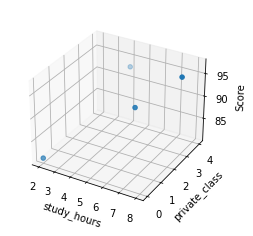

In [4]:
# %matplotlib qt5

ax = plt.axes(projection='3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
ax.dist = 11
ax.scatter(x1,x2,y)
plt.show()

In [5]:
font_path = "C:\Windows\Fonts\gulim.ttc"
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name) 

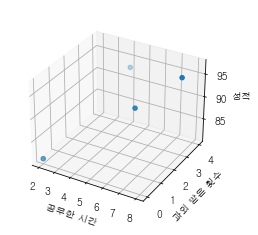

In [6]:
ax = plt.axes(projection='3d')
ax.set_xlabel('공부한 시간')
ax.set_ylabel('과외 받은 횟수')
ax.set_zlabel('성적')
ax.dist = 11
ax.scatter(x1,x2,y)
plt.show()

In [7]:
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)

In [8]:
a1 = 0
a2 = 0
b = 0

lr = 0.02 
epochs = 2001

In [9]:
# 경사 하강법
for i in range(epochs): 
    y_pred = a1 * x1_data + a2 * x2_data + b  # y를 구하는 식
    error = y_data - y_pred  # 오차

    a1_diff = -(2/len(x1_data)) * sum(x1_data * (error)) # 오차함수를 a1로 편미분 
    a2_diff = -(2/len(x2_data)) * sum(x2_data * (error)) # 오차함수를 a2로 편미분 

    b_diff = -(2/len(x1_data)) * sum(y_data - y_pred)  # 오차함수를 b로 편미분

    a1 = a1 - lr * a1_diff  # 학습률을 곱해 기존의 a1값을 업데이트
    a2 = a2 - lr * a2_diff  # 학습률을 곱해 기존의 a2값을 업데이트

    b = b - lr * b_diff  # 학습률을 곱해 기존의 b값을 업데이트

    if i % 100 == 0:   
        print("epoch=%.f, \t 기울기1 a =%.04f, \t 기울기2 a =%.04f, \t 절편 b =%.04f" % (i, a1, a2, b))

epoch=0, 	 기울기1 a =18.5600, 	 기울기2 a =8.4500, 	 절편 b =3.6200
epoch=100, 	 기울기1 a =7.2994, 	 기울기2 a =4.2867, 	 절편 b =38.0427
epoch=200, 	 기울기1 a =4.5683, 	 기울기2 a =3.3451, 	 절편 b =56.7901
epoch=300, 	 기울기1 a =3.1235, 	 기울기2 a =2.8463, 	 절편 b =66.7100
epoch=400, 	 기울기1 a =2.3591, 	 기울기2 a =2.5823, 	 절편 b =71.9589
epoch=500, 	 기울기1 a =1.9546, 	 기울기2 a =2.4427, 	 절편 b =74.7362
epoch=600, 	 기울기1 a =1.7405, 	 기울기2 a =2.3688, 	 절편 b =76.2058
epoch=700, 	 기울기1 a =1.6273, 	 기울기2 a =2.3297, 	 절편 b =76.9833
epoch=800, 	 기울기1 a =1.5673, 	 기울기2 a =2.3090, 	 절편 b =77.3948
epoch=900, 	 기울기1 a =1.5356, 	 기울기2 a =2.2980, 	 절편 b =77.6125
epoch=1000, 	 기울기1 a =1.5189, 	 기울기2 a =2.2922, 	 절편 b =77.7277
epoch=1100, 	 기울기1 a =1.5100, 	 기울기2 a =2.2892, 	 절편 b =77.7886
epoch=1200, 	 기울기1 a =1.5053, 	 기울기2 a =2.2875, 	 절편 b =77.8209
epoch=1300, 	 기울기1 a =1.5028, 	 기울기2 a =2.2867, 	 절편 b =77.8380
epoch=1400, 	 기울기1 a =1.5015, 	 기울기2 a =2.2862, 	 절편 b =77.8470
epoch=1500, 	 기울기1 a =1.5008, 	 기울기2 a =2.2860, 	 절편

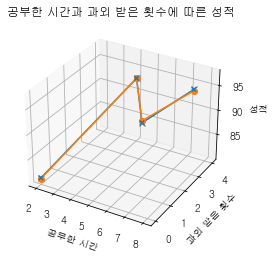

In [10]:
ax1 = plt.axes(projection='3d')
ax1.set_xlabel('공부한 시간')
ax1.set_ylabel('과외 받은 횟수')
ax1.set_zlabel('성적')
ax1.dist = 10  # 숫자가 작으면 상대적으로 확대, 숫자가 크면 상대적으로 축소 

plt.title("공부한 시간과 과외 받은 횟수에 따른 성적")
ax1.scatter(x1, x2, y_data, alpha=1.0,  marker="x" )
ax1.scatter(x1, x2, y_pred, alpha=1.0,  marker="o")

ax1.plot(x1, x2, y_data, alpha=1.0,  marker="x" )
ax1.plot(x1, x2, y_pred, alpha=1.0,  marker="o")
plt.show()